In [128]:
# For analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# For visualization 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

pd.options.display.max_columns=None
pd.options.display.max_rows=None
pd.options.display.float_format='{:.2f}'.format

## Load Datasets 

In [129]:
df_train = pd.read_csv('datasets/train.csv')
df_test = pd.read_csv('datasets/test.csv')
df_comb = [df_train, df_test]

## Analyze by describing data

### Training Dataset

In [130]:
print(df_train.shape)
df_train.head(10)

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
5,6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.46,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.86,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.07,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.13,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.07,NaN,C


In [131]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [132]:
df_train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [133]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [134]:
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Emanuel, Miss. Virginia Ethel",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


**Age, Cabin, 그리고 Embarked에 NaN값으로 누락된 데이터가 존재** 

### Testing Dataset

In [82]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Explore

### Pclass

In [143]:
df_train[['Pclass', 'Survived']].groupby(by=['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.63
1,2,0.47
2,3,0.24


In [148]:
pd.pivot_table(data=train, index='Pclass', values='Survived')

,Survived
Pclass,
1,0.63
2,0.47
3,0.24


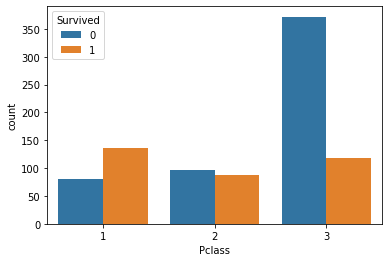

In [29]:
sns.countplot(data=train, x='Pclass', hue='Survived')

### Insight

* 선실 등급이 높을수록 죽을 확률보다 생존할 확률이 크다.
* 가장 낮은 등급인 3등칸에 가장 많은 승객이 탑승하고 있다.
* 1등급, 2등급 선실의 승객이 생존할 확률이 높다.


### Sex

In [159]:
df_train[['Sex', 'Survived']].groupby(by=['Sex']).mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.74
male,0.19


In [160]:
pd.pivot_table(data=train, index='Sex', values='Survived')

,Survived
Sex,
female,0.74
male,0.19


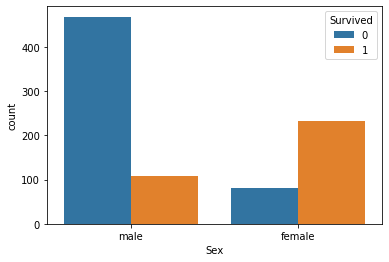

In [30]:
sns.countplot(data=train, x='Sex', hue='Survived')

### 분석 결과

1. 남자보다 여자가 생존할 확률이 높다.
2. 여자보다 남자가 더 많이 탑승하고 있다.

### Age

In [78]:
revised_data = train['Fare'] < 100

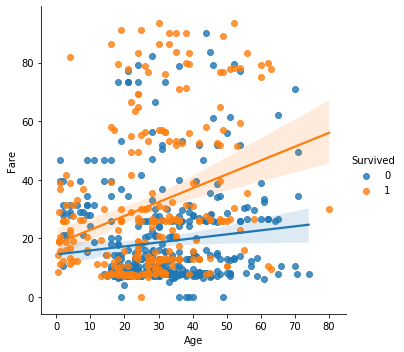

In [67]:
sns.lmplot(data=revised_data, x='Age', y='Fare', hue='Survived')

### 분석 결과 

1. 나이가 어릴수록 생존할 확률이 높다.
2. 탑승권 가격이 높을수록 생존할 확률이 높다. 탑승권 가격은 선실 등급과 비례한다.
3. 탑승권 가격이 50이상인 경우 생존할 확률이 높다.

### SibSp 

In [163]:
df_train[['SibSp', 'Survived']].groupby(by=['SibSp']).mean().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


In [166]:
pd.pivot_table(data=df_train, index='SibSp', values='Survived').sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.54
2,0.46
0,0.35
3,0.25
4,0.17
5,0.00
8,0.00


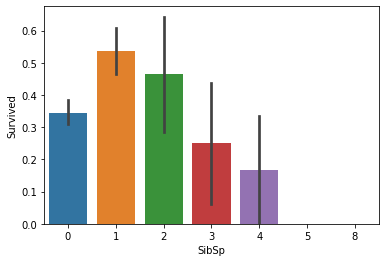

In [45]:
sns.barplot(data=train, x='SibSp', y='Survived')

### Insight

1. 형제 또는 배우자의 수가 적을수록 생존할 확률이 높다.
2. 1~2명인 승객의 생존할 확률이 높다.

### Parch

In [168]:
df_train[['Parch', 'Survived']].groupby(by='Parch').mean().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


In [171]:
pd.pivot_table(data=df_train, index='Parch', values='Survived').sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.60
1,0.55
2,0.50
0,0.34
5,0.20
4,0.00
6,0.00


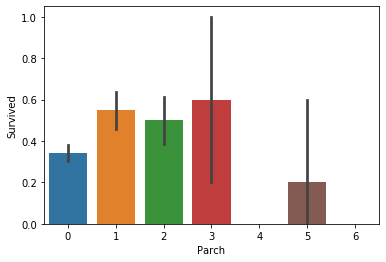

In [49]:
sns.barplot(data=train, x='Parch', y='Survived')

### Fare

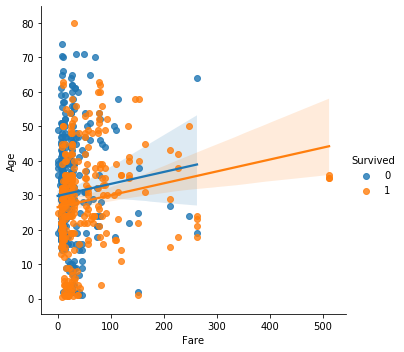

In [57]:
sns.lmplot(data=train, x='Fare', y='Age', hue='Survived')

### Embarked

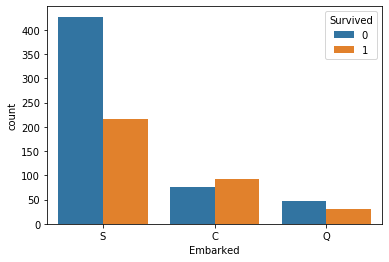

In [58]:
sns.countplot(data=train, x='Embarked', hue='Survived')